# Assignment1

### 3.1 Pseudonymisation

Imports

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [88]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_57995/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with more than 5 NaN

In [89]:
df=df.dropna(thresh=23)


Display

In [90]:
display(df)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
12,11416.0,Mike Abgarian,NaN,NaN,NaN,Male,31.0,65.0,150.0,119.0,...,465.0,405.0,81.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,2-4 years|,NaN
20,21053.0,Douglas Acker,North East,CrossFit South Shore LI,Crossfit South Shore L.I.,Male,42.0,72.0,210.0,198.0,...,515.0,505.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,4+ years|,NaN
21,21269.0,Erik Acevedo,Southern California,CrossFit Training Yard,CrossFit Training Yard,Male,30.0,71.0,200.0,243.0,...,385.0,315.0,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,NaN
22,21685.0,Richard Ablett,Africa,Cape CrossFit Wolfpack,Cape CrossFit,Male,28.0,70.0,176.0,720.0,...,335.0,254.0,27.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695.0,Carley Feil,Northern California,CrossFit Combat Fitness,CrossFit Combat Fitness,Female,20.0,67.0,140.0,NaN,...,209.0,180.0,7.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,Less than 6 months|,2015-03-25 09:49:19
422421,385519.0,Dru Miller,South East,CrossFit Resurgens,CrossFit Resurgens at Powers Ferry,Male,28.0,70.0,180.0,NaN,...,365.0,285.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,2015-03-25 09:50:25
422518,92194.0,Robert North,North East,BayState CrossFit,BayState CrossFit,Male,40.0,70.0,175.0,479.0,...,275.0,255.0,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I played college sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,NaN,2015-03-25 09:51:11
422754,539852.0,Ted Worden,South East,Black Box Strong,CrossFit Black Box,Male,27.0,69.0,175.0,399.0,...,385.0,265.0,NaN,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,6-12 months|,2015-03-25 09:53:04


In [91]:
df.apply(pd.Series.nunique)

athlete_id            21747
name                  21409
region                   17
team                   3787
affiliate              5921
gender                    2
age                      43
height                   58
weight                  248
fran                    821
helen                   847
grace                   714
filthy50               1767
fgonebad                474
run400                  259
run5k                  1299
candj                   323
snatch                  286
deadlift                431
backsq                  404
pullups                 128
eat                      40
train                    74
background               38
experience               68
schedule                117
howlong                  25
retrieved_datetime    16597
dtype: int64

Text(0.5, 1.0, 'Cardinality')

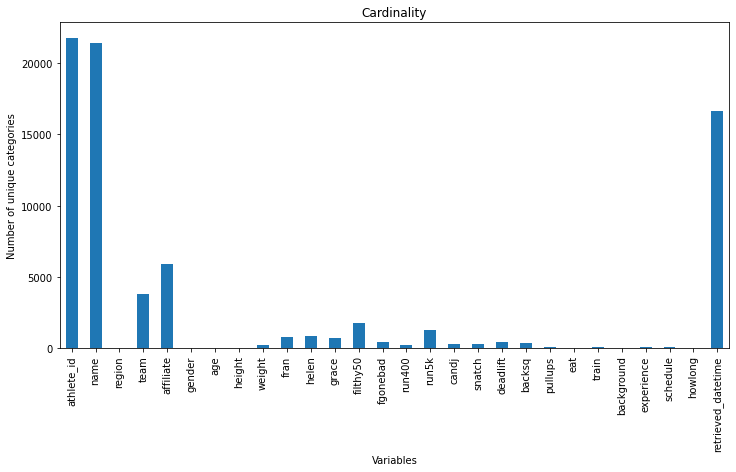

In [92]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### explicit personally identifiable information
are name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [93]:
an = anonymize(df)

display name column and corresponding fake name column

In [94]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
3,Abo Brandon,Glenn Lamb
12,Mike Abgarian,Dr Karl Potts
20,Douglas Acker,Josephine Davies
21,Erik Acevedo,Rachael Henderson
22,Richard Ablett,Abigail Lawson
...,...,...
422278,Carley Feil,Dr Marie Smith
422421,Dru Miller,Mr Damian Hammond
422518,Robert North,Dr Frank Wilkins
422754,Ted Worden,Olivia Phillips


display name athlete_id and corresponding fake id column

In [95]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
3,5164,ONVG94094128486431
12,11416,BOOD09504787500562
20,21053,BTYG45076523557829
21,21269,IQGH36359583506992
22,21685,QIJZ44433736087627
...,...,...
422278,553695,BBYZ19873450850332
422421,385519,GRBA56074597827166
422518,92194,VUIX71407929830050
422754,539852,DMMF36604409051789


### 3.2 Randomisation

In [96]:
from faker import Faker

#### Generate two lists of meaningful names for first and last names

Functions to generate names

Generate 21747(size of data set) random unique first and last names

In [97]:
fake = Faker()

first_names = set()
last_names = set()
while len(first_names) < 690 and len(last_names) < 1000:
    first_names.add(fake.first_name())
    last_names.add(fake.last_name())

first_names_list=list(first_names)
last_names_list=list(last_names)


generate a random name combination

In [98]:
def generate_random_name():
    return f"{random.choice(first_names_list)} {random.choice(last_names_list)}"

In [99]:
num_unique_names = 21747  

random_names = set()
while len(random_names) < num_unique_names:
    random_names.add(generate_random_name())

display

In [100]:
random_names

{'Curtis Mayer',
 'Rachel Cardenas',
 'Mallory Kramer',
 'Stacy Braun',
 'Manuel Brewer',
 'Bruce Rush',
 'Mario Oneal',
 'Cheyenne Arias',
 'Kelli Woodward',
 'Louis David',
 'Aaron Pitts',
 'Destiny Hines',
 'Devon Hester',
 'Jenna Dixon',
 'Anna Hickman',
 'Sally Lee',
 'Sue Durham',
 'Paul Allison',
 'Raymond Underwood',
 'Nicholas Oliver',
 'Gloria Tapia',
 'Bethany Cuevas',
 'Cristian Hardy',
 'Sandra Welch',
 'Megan Payne',
 'Cole Shepherd',
 'Nicole Lowery',
 'Mary Adkins',
 'Melanie Dyer',
 'Geoffrey Hubbard',
 'Judith Klein',
 'Ariel Mueller',
 'Duane Hancock',
 'Garrett Brandt',
 'Matthew Clements',
 'Beverly Sweeney',
 'Dalton Villarreal',
 'Ronald Best',
 'Clinton Sims',
 'Jack Tapia',
 'Randall Pham',
 'Crystal Richmond',
 'Traci Hunt',
 'Karina Lindsey',
 'Rhonda Wells',
 'John Hanson',
 'Kara Herrera',
 'Alyssa Dennis',
 'Alicia Donovan',
 'Miguel Alvarez',
 'Jacqueline Coleman',
 'Vernon Jensen',
 'Ellen Owen',
 'Jon Benson',
 'Gina Sloan',
 'Warren Walter',
 'Mikayla 

generate lookup table

In [109]:
lookup = pd.DataFrame({"original_name": df['name'], 
                    "random_name": list(random_names)}) 

lookup_table=dict(zip(lookup['random_name'], lookup['original_name']))


display(lookup_table)

{'Curtis Mayer': 'Abo Brandon',
 'Rachel Cardenas': 'Mike Abgarian',
 'Mallory Kramer': 'Douglas Acker',
 'Stacy Braun': 'Erik Acevedo',
 'Manuel Brewer': 'Richard Ablett',
 'Bruce Rush': 'Joe Abruzzo',
 'Mario Oneal': 'Jerry Abadom',
 'Cheyenne Arias': 'Brigham Abbott',
 'Kelli Woodward': 'Colton Achtenberg',
 'Louis David': 'Bill Adams',
 'Aaron Pitts': 'Justin Adams',
 'Destiny Hines': 'Chris Ackley',
 'Devon Hester': 'Daniel Adamson',
 'Jenna Dixon': 'Bryan Acosta',
 'Anna Hickman': 'Landon Adams',
 'Sally Lee': 'Steven Lee Adams',
 'Sue Durham': 'Lorin Adams',
 'Paul Allison': 'jaime acuna',
 'Raymond Underwood': 'Jason Adams',
 'Nicholas Oliver': 'Stacey Adams',
 'Gloria Tapia': 'Craig Adams',
 'Bethany Cuevas': 'David Ackland',
 'Cristian Hardy': 'Jan-Ronald Agay',
 'Sandra Welch': 'John Aguilar',
 'Megan Payne': 'Shaun Adkins',
 'Cole Shepherd': 'Christian Aguirre',
 'Nicole Lowery': 'Rolf Adelsberger',
 'Mary Adkins': 'Frederik Aegidius',
 'Melanie Dyer': 'Tim Adkins',
 'Geoff

replace real names with random ones

In [111]:
df['name']=lookup['random_name']
display(df)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,eat,train,background,experience,schedule,howlong,retrieved_datetime,Fake_name,Fake_athlete_id,new_col
3,5164,Curtis Mayer,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN,Glenn Lamb,ONVG94094128486431,Curtis Mayer
12,11416,Rachel Cardenas,NaN,NaN,NaN,Male,31.0,65.0,150.0,119.0,...,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,2-4 years|,NaN,Dr Karl Potts,BOOD09504787500562,Rachel Cardenas
20,21053,Mallory Kramer,North East,CrossFit South Shore LI,Crossfit South Shore L.I.,Male,42.0,72.0,210.0,198.0,...,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,4+ years|,NaN,Josephine Davies,BTYG45076523557829,Mallory Kramer
21,21269,Stacy Braun,Southern California,CrossFit Training Yard,CrossFit Training Yard,Male,30.0,71.0,200.0,243.0,...,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,NaN,Rachael Henderson,IQGH36359583506992,Stacy Braun
22,21685,Manuel Brewer,Africa,Cape CrossFit Wolfpack,Cape CrossFit,Male,28.0,70.0,176.0,720.0,...,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,NaN,Abigail Lawson,QIJZ44433736087627,Manuel Brewer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Gwendolyn Wheeler,Northern California,CrossFit Combat Fitness,CrossFit Combat Fitness,Female,20.0,67.0,140.0,NaN,...,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,Less than 6 months|,2015-03-25 09:49:19,Dr Marie Smith,BBYZ19873450850332,Gwendolyn Wheeler
422421,385519,Lauren Richmond,South East,CrossFit Resurgens,CrossFit Resurgens at Powers Ferry,Male,28.0,70.0,180.0,NaN,...,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,2015-03-25 09:50:25,Mr Damian Hammond,GRBA56074597827166,Lauren Richmond
422518,92194,Troy Dillon,North East,BayState CrossFit,BayState CrossFit,Male,40.0,70.0,175.0,479.0,...,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I played college sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,NaN,2015-03-25 09:51:11,Dr Frank Wilkins,VUIX71407929830050,Troy Dillon
422754,539852,Sarah Mooney,South East,Black Box Strong,CrossFit Black Box,Male,27.0,69.0,175.0,399.0,...,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,6-12 months|,2015-03-25 09:53:04,Olivia Phillips,DMMF36604409051789,Sarah Mooney


try getting the original name from lookup table

In [113]:
lookup_table.get('Curtis Mayer')

'Abo Brandon'

### 3.3 Aggregation 